In [116]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [117]:
# Load dataframes
df_test = pd.read_csv("simulated_time_series_lp_data_test.csv", names = ['Pin1', 'Pin2', 'Pin3', 'Pin4', 'Pin5', 'Method'])
df_validation = pd.read_csv("simulated_time_series_lp_data_validation.csv", names = ['Pin1', 'Pin2', 'Pin3', 'Pin4', 'Pin5', 'Method'])
df_train = pd.read_csv("simulated_time_series_lp_data.csv", names = ['Pin1', 'Pin2', 'Pin3', 'Pin4', 'Pin5', 'Method'])


In [118]:
# Separate labels and features for the train, test, and validation datasets

df_train = df_train[df_train.Pin1 != 'Pin1']
df_features = df_train.sample(frac=1).copy()
df_labels = df_features.pop('Method')
#df_features
#df_labels
df_labels = df_labels[0:]
method_dictionary = {'Picked': 0, 'Key' : 1, 'Method' : 2}
df_labels = df_labels.apply(lambda x: method_dictionary[x])
df_labels_np = np.array(df_labels, dtype='d')

df_test = df_test[df_test.Pin1 != 'Pin1']
df_test_features = df_test.sample(frac=1).copy()
df_test_labels = df_test_features.pop('Method')
#df_test_features
#df_test_labels
df_test_labels = df_test_labels[0:]
method_dictionary = {'Picked': 0, 'Key' : 1, 'Method' : 2}
df_test_labels = df_test_labels.apply(lambda x: method_dictionary[x])
df_test_labels_np = np.array(df_test_labels, dtype='d')

df_validation = df_validation[df_validation.Pin1 != 'Pin1']
df_validation_features = df_validation.sample(frac=1).copy()
df_validation_labels = df_validation_features.pop('Method')
#df_validation_labels
df_validation_labels = df_validation_labels[0:]
method_dictionary = {'Picked': 0, 'Key' : 1, 'Method' : 2}
df_validation_labels = df_validation_labels.apply(lambda x: method_dictionary[x])
df_validation_labels_np = np.array(df_validation_labels, dtype='f')


In [119]:
# Get a sample of the data for the plot
df_train_short = pd.concat([df_train.head(8), df_train.tail(8)], ignore_index=True)
df_train_short

,Pin1,Pin2,Pin3,Pin4,Pin5,Method
0,0.48511890212003494,0.6442340115653548,0.8562089417532628,0.9748924646966292,1.026064413000658,Picked
1,0.08219881592974372,0.416489144028688,0.7180727021358101,0.8161994745811658,0.8649594110823622,Picked
2,0.4093069432576151,0.6124073761235453,0.616335300634627,1.002102488377529,1.196923293440662,Picked
3,0.2308861730658958,0.4028040570507603,0.7113362634312328,0.7555129852640423,1.0768087428786453,Picked
4,0.7046108211906082,0.7208400373556525,0.7719003605862802,0.7805820200994771,0.8593883166982951,Picked
5,0.04840670835447294,0.3055903157782005,0.36571387871077377,0.5237219322747175,0.7957054190348187,Picked
6,0.3836007674847005,0.6791183622190753,0.7576248159451225,0.7591890322732862,0.8266904773062806,Picked
7,0.2984778981762702,0.8309401691430204,0.8893102122011833,1.0013601298006165,1.0227155330352367,Picked
8,0.045846591862821806,0.05335835135397837,0.08748607301227851,0.5325878561253224,0.6684526777545821,Key
9,0.13472796181498092,0.21244597757710992,0.45950684671242403,0.7973675400415187,0.8722682984334884,Key


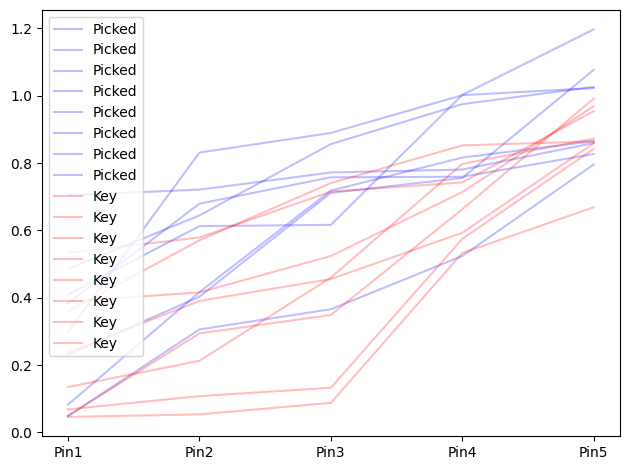

In [120]:
# Plot pin delays

from matplotlib import pyplot as plt

df_train_column_names = ['Pin1', 'Pin2','Pin3', 'Pin4','Pin5']

df_features_picked = []
df_features_key = []

def add_rows_to_lists(p1, p2, p3, p4, p5, m):
    if p1 != 'Pin1':
        l = []
        l.append(float(p1))
        l.append(float(p2))
        l.append(float(p3))
        l.append(float(p4))
        l.append(float(p5))
        if m == 'Picked':
            df_features_picked.append(l)
            plt.plot(df_train_column_names, l, color='blue', label='Picked', alpha=0.25)
        else:
            df_features_key.append(l)
            plt.plot(df_train_column_names, l, color='red', label='Key', alpha=0.25)

    
result = [add_rows_to_lists(p1, p2, p3, p4, p5, m) for p1, p2, p3, p4, p5, m in zip(df_train_short['Pin1'], df_train_short['Pin2'], df_train_short['Pin3'], df_train_short['Pin4'], df_train_short['Pin5'], df_train_short['Method'])]

df_features_picked
    
plt.legend()
plt.tight_layout()
plt.show()

In [121]:
# Turn dataframes into numpy arrays
df_features = df_features[0:].values.astype(float)
df_features = np.array(df_features[0:], dtype='d')
#df_features
df_test_features = df_test_features[0:].values.astype(float)
df_test_features = np.array(df_test_features[0:], dtype='d')
#df_test_features
df_validation_features = df_validation_features[0:].values.astype(float)
df_validation_features = np.array(df_validation_features[0:], dtype='d')
#df_validation_features

# Create datasets
train_dataset = tf.data.Dataset.from_tensor_slices((df_features, df_labels_np))
train_dataset = train_dataset.shuffle(buffer_size=len(df_features)).batch(50)
val_dataset = tf.data.Dataset.from_tensor_slices((df_validation_features, df_validation_labels_np))
train_dataset = train_dataset.shuffle(buffer_size=len(df_validation_features)).batch(50)

In [122]:
# Add and adapt layers for the model generation
normalize = layers.Normalization()

normalize.adapt(df_validation_features)
normalize.adapt(df_features)

norm_lp_df_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

# Compile the model
norm_lp_df_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

# Train the model
norm_lp_df_model.fit(x=df_features, y=df_labels, epochs=10, validation_data=(df_validation_features, df_validation_labels))


Epoch 1/10
17/17 [==============================] - 1s 21ms/step - loss: 0.5136 - val_loss: 0.3982
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.3087 - val_loss: 0.2709
Epoch 3/10
17/17 [==============================] - 0s 8ms/step - loss: 0.2369 - val_loss: 0.2296
Epoch 4/10
17/17 [==============================] - 0s 7ms/step - loss: 0.2160 - val_loss: 0.2190
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.2113 - val_loss: 0.2168
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 0.2137 - val_loss: 0.2165
Epoch 7/10
17/17 [==============================] - 0s 7ms/step - loss: 0.2114 - val_loss: 0.2163
Epoch 8/10
17/17 [==============================] - 0s 7ms/step - loss: 0.2119 - val_loss: 0.2156
Epoch 9/10
17/17 [==============================] - 0s 7ms/step - loss: 0.2146 - val_loss: 0.2180
Epoch 10/10
17/17 [==============================] - 0s 7ms/step - loss: 0.2116 - val_loss: 0.2159


In [123]:
# Evaluate the model's performance
results = norm_lp_df_model.evaluate(df_test_features, df_test_labels_np)
print("test loss, test acc:", results)

27/27 [==============================] - 0s 3ms/step - loss: 0.2125
test loss, test acc: 0.2125413715839386


In [124]:
# Export our model

import os
from sys import platform

#cwd = os.getcwd()

path = 'lp_model_dir'

delimiter = '/'

if platform == "win32":
    delimiter = '\\'

if not os.path.exists(path):
    os.mkdir(path)
else:
    print("Folder %s already exists" % path)

relative_path = path + delimiter + '1' + delimiter

if not os.path.exists(relative_path):
    os.mkdir(relative_path)
else:
    print("Folder %s already exists" % relative_path)
    
full_specific_model_directory = os.path.normpath(os.getcwd() + delimiter + relative_path)
tf.saved_model.save(norm_lp_df_model, full_specific_model_directory)

#loaded = tf.saved_model.load(full_specific_model_directory)


Folder lp_model_dir already exists
Folder lp_model_dir\1\ already exists
INFO:tensorflow:Assets written to: C:\Users\marga\AppData\Local\Programs\Python\Python310\Scripts\lp_model_dir\1\assets
